In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm as tqdm
import numpy as np
import seaborn as sns
from LabUtils.Utils import mkdirifnotexists

In [2]:
from LabData.DataAnalyses.TenK_Trajectories.biological_age.predict_age import work_dir, pred_dir, \
        modality_name_mapping, add_text_at_corner, male_color, female_color
sex_colors = {'Male': male_color, 'Female': female_color}
#     work_dir, pred_dir, pred_residuals_fig_dir, load_ranked_residuals, Ys_dir, sm, r2_score, \
#     BodyMeasuresLoader, add_text_at_corner
# sex_class_dir = os.path.join(work_dir, 'sex_classification')
loess_dir = os.path.join(work_dir, 'sex_specific_corrs', 'loess')

In [3]:
fig_dir = mkdirifnotexists(os.path.join(work_dir, 'figures', 'figure5'))

In [4]:
cat_to_exclude = ['diet_questions']
exclude = ['blood_lipids']

r = pd.read_csv(os.path.join(pred_dir, 'results.csv'), index_col=0).drop(cat_to_exclude+exclude, axis=0)


r2_col = 'Coefficient_of_determination'

df_dic = {}
for sex in ['male', 'female']:
    df_list = []
    for name in r.index:
        d = pd.read_csv(os.path.join(loess_dir, 'lipid_cluster_median_prediction', name, '%s-lipid_cluster_median' % sex, 
                                     'cv_results.csv'), index_col=0)[[r2_col]]\
        .rename(columns={r2_col: modality_name_mapping[name]})
        df_list.append(d)
    df_dic[sex] = pd.concat(df_list, axis=1).sort_index().T


# trying to show the mean lipid prediction per cluster

In [26]:
cat_to_exclude = ['diet_questions']
exclude = ['blood_lipids']

r = pd.read_csv(os.path.join(pred_dir, 'results.csv'), index_col=0).drop(cat_to_exclude+exclude, axis=0)


r2_col = 'Coefficient_of_determination'

y_path = os.path.join(work_dir, 'Xs', 'blood_lipids.csv')
y = pd.read_csv(y_path, index_col=0)

cluster_label = pd.read_csv(os.path.join(loess_dir, 'blood_lipids_labels_df.csv'), index_col=0).rename(columns={'0': 'cluster'})
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
n_clusters = 6
df_dic = {}
sex_dic = {'male': 1, 'female': 0}
for sex in ['male', 'female']:
    y_sex = y[y.gender == sex_dic[sex]]
    df_list = []
    for name in r.index:
        print(name)
        pred = pd.read_csv(os.path.join(work_dir, 'blood_lipids_predictions', '%s-blood_lipids' % name, 
                                        'cv_predictions_df.csv'), index_col=0).reindex(y_sex.index)
        
        res_df = pd.DataFrame(index=[modality_name_mapping[name]])
        for i in range(n_clusters):
            lipids = cluster_label[cluster_label.cluster == i].index
            r2_list = []
            for c in lipids:
                df = pd.concat((y_sex[c], pred[c]), axis=1).dropna()
#                 r2_list.append(max(0, r2_score(y_true=df.iloc[:, 0], y_pred=df.iloc[:, 1])))
                r2_list.append(max(0, pearsonr(df.iloc[:, 0], df.iloc[:, 1])[0]))
            res_df['cluster_%d' % i] = np.max(r2_list)
            print(res_df)
        df_list.append(res_df)
    df_dic[sex] = pd.concat(df_list, axis=0)


cardiovascular_system


/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


                       cluster_0
Cardiovascular system    0.44055
                       cluster_0  cluster_1
Cardiovascular system    0.44055   0.430664
                       cluster_0  cluster_1  cluster_2
Cardiovascular system    0.44055   0.430664   0.532773
                       cluster_0  cluster_1  cluster_2  cluster_3
Cardiovascular system    0.44055   0.430664   0.532773   0.365688
                       cluster_0  cluster_1  cluster_2  cluster_3  cluster_4
Cardiovascular system    0.44055   0.430664   0.532773   0.365688   0.382853
                       cluster_0  cluster_1  cluster_2  cluster_3  cluster_4  \
Cardiovascular system    0.44055   0.430664   0.532773   0.365688   0.382853   

                       cluster_5  
Cardiovascular system   0.445425  
immune_system


/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


               cluster_0
Immune system   0.218638
               cluster_0  cluster_1
Immune system   0.218638   0.219574
               cluster_0  cluster_1  cluster_2
Immune system   0.218638   0.219574   0.247462
               cluster_0  cluster_1  cluster_2  cluster_3
Immune system   0.218638   0.219574   0.247462   0.243819
               cluster_0  cluster_1  cluster_2  cluster_3  cluster_4
Immune system   0.218638   0.219574   0.247462   0.243819   0.228832
               cluster_0  cluster_1  cluster_2  cluster_3  cluster_4  \
Immune system   0.218638   0.219574   0.247462   0.243819   0.228832   

               cluster_5  
Immune system   0.440991  
diet


/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


      cluster_0
Diet   0.703964
      cluster_0  cluster_1
Diet   0.703964   0.584421
      cluster_0  cluster_1  cluster_2
Diet   0.703964   0.584421   0.629144
      cluster_0  cluster_1  cluster_2  cluster_3
Diet   0.703964   0.584421   0.629144    0.60872
      cluster_0  cluster_1  cluster_2  cluster_3  cluster_4
Diet   0.703964   0.584421   0.629144    0.60872   0.596102
      cluster_0  cluster_1  cluster_2  cluster_3  cluster_4  cluster_5
Diet   0.703964   0.584421   0.629144    0.60872   0.596102    0.56546
lifestyle


KeyboardInterrupt: 

In [12]:
from math import pi
df_male = df_dic['male'].rename(columns={k: int(k.split('_')[-1])+1 for k in df_dic['male'].columns})
df_female = df_dic['female'].rename(columns={k: int(k.split('_')[-1])+1 for k in df_dic['male'].columns})
df_male = df_male.loc[df_female.index]

def plot_radial(df_male, df_female, name, ax, i):



    # number of variable
    categories = df_male.columns
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    # fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # ax.plot([0, 1], [0, 1])
    # ax = plt.subplot(133, projection='polar')
    # ax = plt.subplot(111, polar=True)
    # ax = axes[0]
#     fig, ax = plt.subplots(1, 1, figsize=(5, 5), subplot_kw={'projection': 'polar'})
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels([str(c).split(' ')[0] for c in categories], ha='center', fontsize=15)

    # Draw ylabels
    ax.set_rlabel_position(0)
    yticks = [0, 0.05, 0.1, 0.15, 0.2, 0.25]
    ax.set_yticks(yticks)
    ax.set_yticklabels([str(t) for t in yticks], color="grey", size=10)
    ax.set_ylim(-0.05, 0.3)


    # ------- PART 2: Add plots

    # Plot each individual = each line of the data
    # I don't do a loop, because plotting more than 3 groups makes the chart unreadable

    # Ind1
    values = df_male.loc[name, :].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label='Male', color=male_color)
    ax.fill(angles, values, alpha=0.1, color=male_color)

    # # Ind2
    values = df_female.loc[name, :].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label='Female', color=female_color)
    ax.fill(angles, values, alpha=0.1, color=female_color)
    
    ax.set_title(name, fontsize=15)
    ax.text(0, 1, i.lower(), ha='center', va='center', transform=ax.transAxes, fontsize=30, weight='bold')

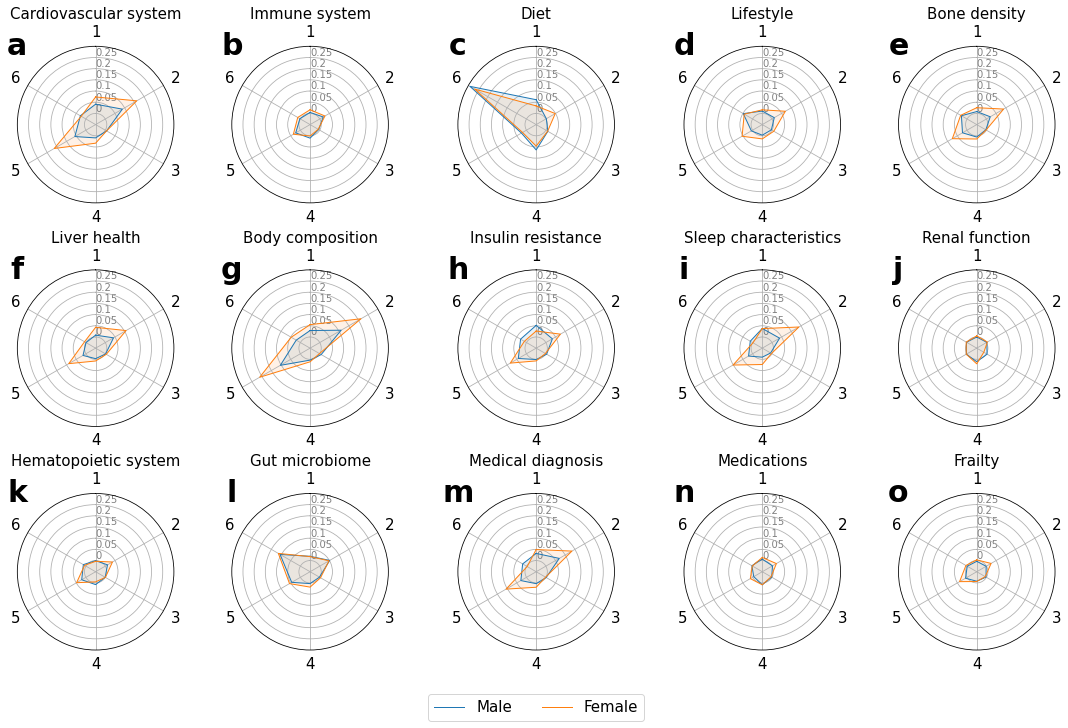

In [81]:
ax_dict = plt.figure(constrained_layout=True, figsize=(15, 10)).subplot_mosaic(
    """
    ABCDE
    FGHIJ
    KLMNO
    """,
    gridspec_kw={"wspace": 0.1, "hspace": 0}, subplot_kw={'projection': 'polar'},
)


for name, i in zip(df_male.index, 'ABCDEFGHIJKLMNO'):
    plot_radial(df_male, df_female, name, ax_dict[i], i)
ax_dict['M'].legend(ncol=2, bbox_to_anchor=(0.5, -0.5), fancybox=True, fontsize=15, loc='lower center')

plt.savefig(os.path.join(fig_dir, 'figure5.png'), dpi=300, bbox_inches='tight')
plt.savefig(os.path.join(fig_dir, 'figure5.pdf'), dpi=300, bbox_inches='tight')

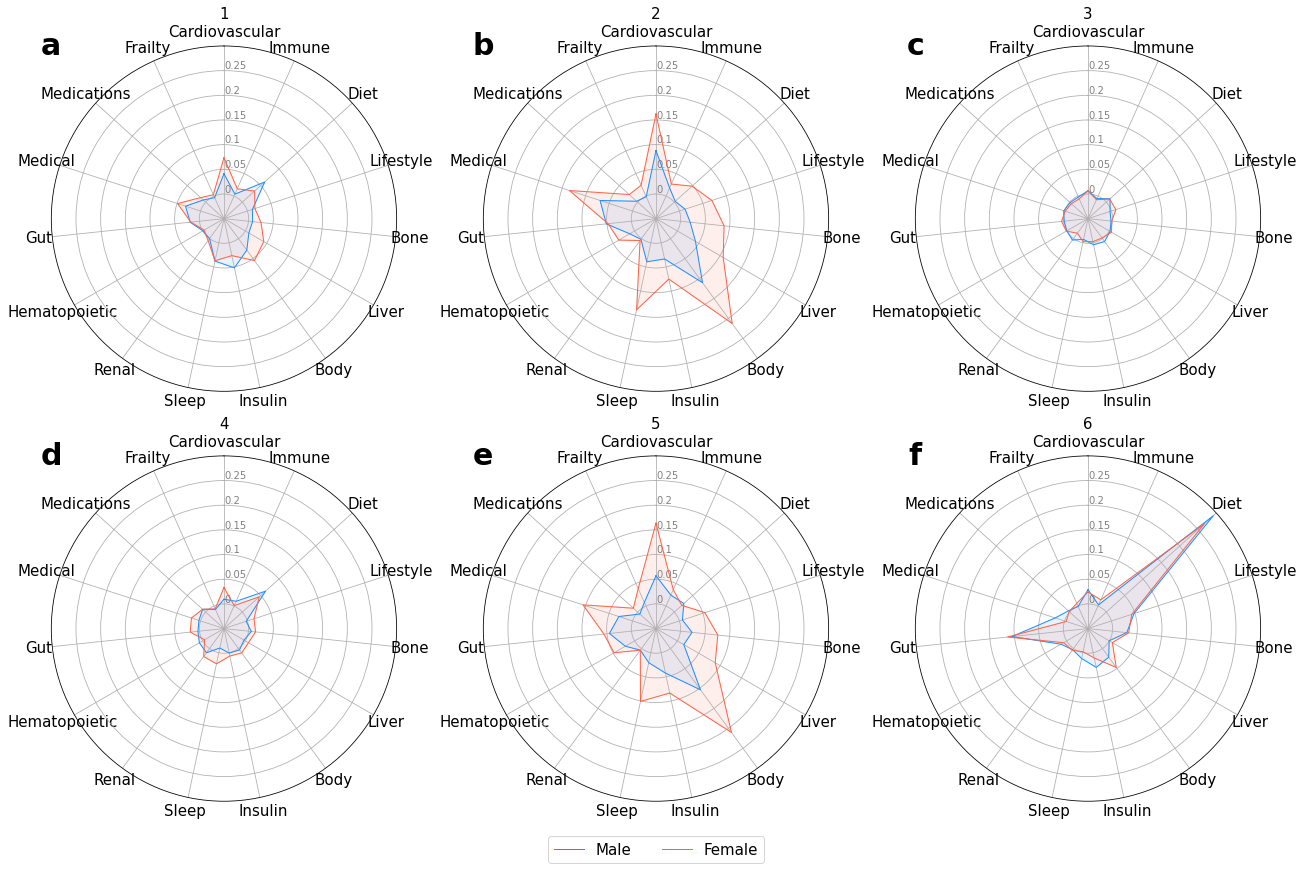

In [7]:
ax_dict = plt.figure(constrained_layout=True, figsize=(18, 12)).subplot_mosaic(
    """
    ABC
    DEF
    """,
    gridspec_kw={"wspace": 0, "hspace": 0}, subplot_kw={'projection': 'polar'},
)


for name, i in zip(df_male.T.index, 'ABCDEF'):
        plot_radial(df_male.T, df_female.T, name, ax_dict[i], i)
ax_dict['E'].legend(ncol=2, bbox_to_anchor=(0.5, -0.2), fancybox=True, fontsize=15, loc='lower center')

plt.savefig(os.path.join(fig_dir, 'figure5_v2.png'), dpi=300, bbox_inches='tight')
plt.savefig(os.path.join(fig_dir, 'figure5_v2.pdf'), dpi=300, bbox_inches='tight')

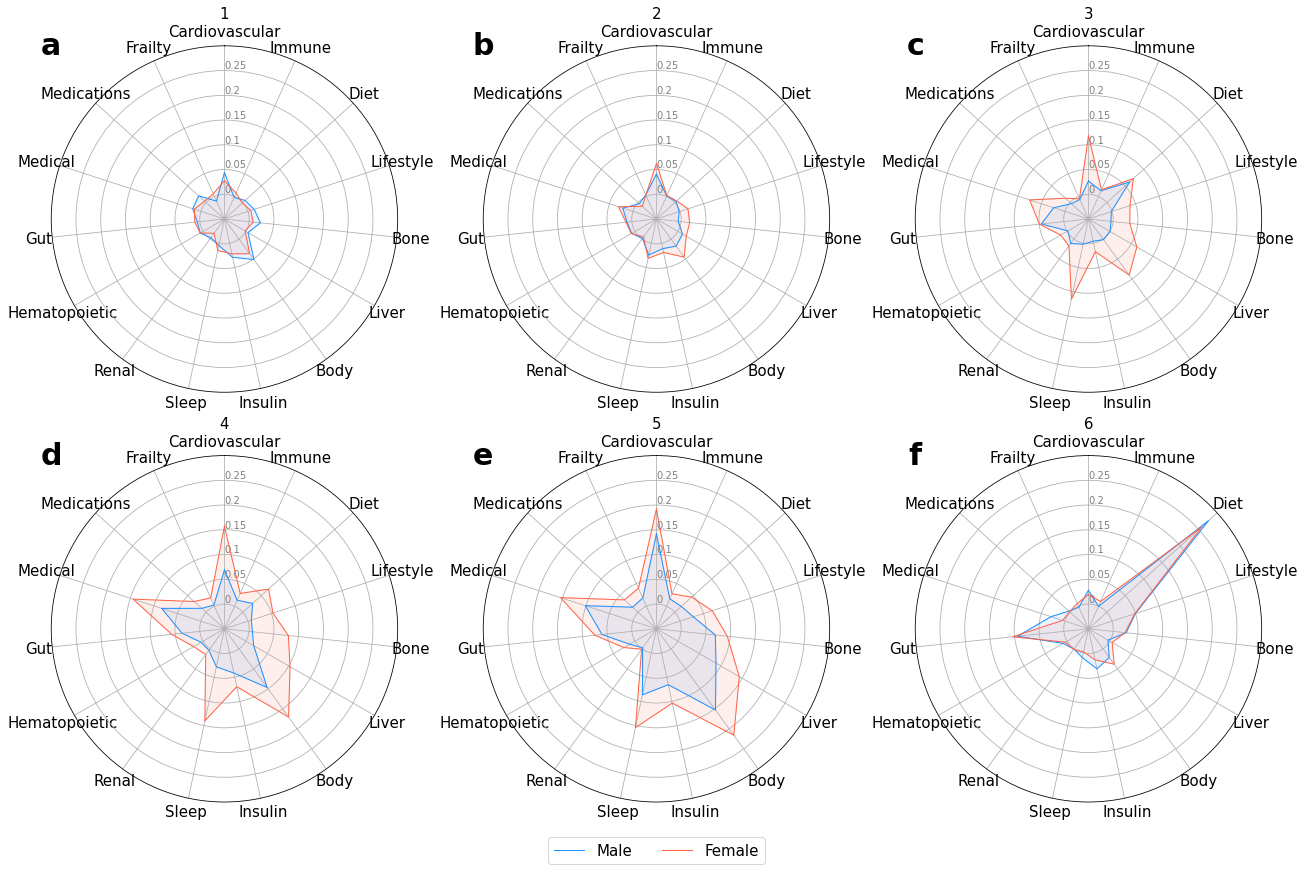

In [13]:
ax_dict = plt.figure(constrained_layout=True, figsize=(18, 12)).subplot_mosaic(
    """
    ABC
    DEF
    """,
    gridspec_kw={"wspace": 0, "hspace": 0}, subplot_kw={'projection': 'polar'},
)


for name, i in zip(df_male.T.index, 'ABCDEF'):
        plot_radial(df_male.T, df_female.T, name, ax_dict[i], i)
ax_dict['E'].legend(ncol=2, bbox_to_anchor=(0.5, -0.2), fancybox=True, fontsize=15, loc='lower center')

# plt.savefig(os.path.join(fig_dir, 'figure5_v2.png'), dpi=300, bbox_inches='tight')
# plt.savefig(os.path.join(fig_dir, 'figure5_v2.pdf'), dpi=300, bbox_inches='tight')